# The Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
maven_music_customers = pd.read_csv(r"C:\Users\THINKPAD\Videos\DS-ML-AI\ML\Python_Data_Science_Data_Prep_EDA\Course Resources\005 Data-Science-in-Python-Data-Prep-EDA\Data\maven_music_customers.csv")

listen_history = pd.read_excel(
    r"C:\Users\THINKPAD\Videos\DS-ML-AI\ML\Python_Data_Science_Data_Prep_EDA\Course Resources\005 Data-Science-in-Python-Data-Prep-EDA\Data\maven_music_listening_history.xlsx", 
    sheet_name = 'listening_history'
)

audio_info = pd.read_excel(
    r"C:\Users\THINKPAD\Videos\DS-ML-AI\ML\Python_Data_Science_Data_Prep_EDA\Course Resources\005 Data-Science-in-Python-Data-Prep-EDA\Data\maven_music_listening_history.xlsx",
    sheet_name = 'audio_files'
)

session = pd.read_excel(
    r"C:\Users\THINKPAD\Videos\DS-ML-AI\ML\Python_Data_Science_Data_Prep_EDA\Course Resources\005 Data-Science-in-Python-Data-Prep-EDA\Data\maven_music_listening_history.xlsx",
    sheet_name = 'session_login_time'
)

In [3]:
maven_music_customers.head(3)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23


In [4]:
listen_history.head(3)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song


In [5]:
audio_info.head(3)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5


In [6]:
session.head(3)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00


# Data Exploration

In [7]:
maven_music_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [8]:
listen_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [9]:
audio_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [10]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


# Data Quality Issues

## Inconsistent Datatypes:

**Maven Music Customer Table**
- Member Since: convert to datetime object
- Subscription Rate: convert to numeric
- Cancellation Date: convert to datetime object 

**Audio Info Table**
- ID: convert to int

## Missing Data

**Maven Music Customer Table**
- Subscription Plan
- Discount?
- Cancellation Date

## Converting Datatypes

In [11]:
maven_music_customers['Member Since'] = pd.to_datetime(maven_music_customers['Member Since'], format = '%m/%d/%y')
maven_music_customers['Cancellation Date'] = pd.to_datetime(maven_music_customers['Cancellation Date'], format = '%m/%d/%y')
maven_music_customers['Subscription Rate'] = pd.to_numeric(maven_music_customers['Subscription Rate'].str.replace('$', ''))
maven_music_customers['Email'] = maven_music_customers['Email'].str.replace('Email: ', '')

In [12]:
maven_music_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


## Duplicates Data Check

In [13]:
# Duplicate check

maven_music_customers.duplicated().sum()

0

## Treating Missing Data

In [14]:
# Missing Value check

maven_music_customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [15]:
maven_music_customers[maven_music_customers.isna().any(axis = 1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [16]:
maven_music_customers['Subscription Plan'].value_counts(dropna = False)

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
NaN                  5
Name: count, dtype: int64

In [17]:
(maven_music_customers.groupby('Subscription Plan', dropna = False)['Subscription Rate']
    .agg({'count', 'mean', 'median', 'std'})
    .reset_index()
)

,Subscription Plan,count,mean,std,median
0,Basic (Ads),12,2.990000,0.000000,2.99
1,Premium (No Ads),13,15.836154,25.304302,7.99
2,NaN,5,2.990000,0.000000,2.99


    - Subscription Plans Basic and NaN groups are identical in Summary statistics for Subscription Rate — NaN is most likely Basic (Ads) subscribers that were mislabeled.

In [18]:
maven_music_customers['Subscription Plan'] = (
    np.where(maven_music_customers['Subscription Plan'].isna() == True, 'Basic (Ads)', maven_music_customers['Subscription Plan'])
)

In [19]:
maven_music_customers['Discount?'].value_counts(dropna = False)

Discount?
NaN    23
Yes     7
Name: count, dtype: int64

In [20]:
maven_music_customers.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,NaN


In [21]:
maven_music_customers[maven_music_customers['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,NaN,2023-06-02
14,6163,Melody Parks,park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,NaN,NaT
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,NaN,2023-06-02


In [22]:
maven_music_customers['Subscription Rate'].value_counts().sort_index()

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64

In [23]:
(maven_music_customers
    .groupby(['Subscription Plan', 'Discount?'], dropna = False)['Subscription Rate']
    .agg(['unique', 'count', 'min', 'max', 'mean', 'median'])
    .reset_index()
)

,Subscription Plan,Discount?,unique,count,min,max,mean,median
0,Basic (Ads),NaN,[2.99],17,2.99,2.99,2.99,2.99
1,Premium (No Ads),Yes,[7.99],7,7.99,7.99,7.99,7.99
2,Premium (No Ads),NaN,"[9.99, 99.99]",6,9.99,99.99,24.99,9.99


The dataset has only 2 Subscription Plans;
- Basic (Ads): Subscription rate 2.99
- Premium (No Ads): Subscription rate (7.99 with discount and 9.99 without discount)

Subscription Rate of 99.99 is a Premium Non-discount subscriber.
Subscription Rate for this class of customer is 9.99.

In [24]:
# Updating outlier

maven_music_customers.loc[maven_music_customers['Subscription Rate'] == 99.99, 'Subscription Rate'] = 9.99

In [25]:
maven_music_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


The dataset is a list of 30 unique customers;

- Join Date: The oldest customer joined our service in March 2023 while the most recent customer joined in May 2023.

- Cancellation Date: 13 of our 30 customers recently cancelled their subscription plan and they all did in the month of June (1st to 3rd: a very short churn window)

- Subscription Rate: 50% of customers subscribe to our Basic (Ads) Plan rate 2.99. Subscriptions go as high as 9.99 for premium customer with no discount and 7.99 for subscribers with discount.

- Discount Subscribers: 7 customers are on discount

- Symphony Rhodes, a Premium Subscriber pays a higher than average price for Premium Users

# Exploratory Data Analysis

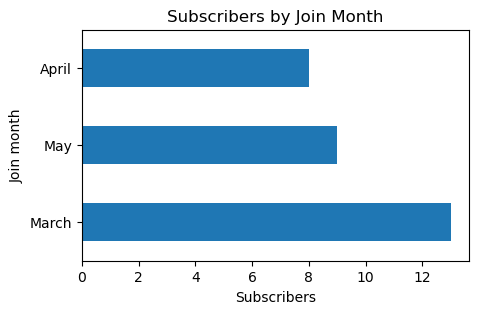

In [26]:
# Membership by Join Date

(maven_music_customers['Member Since']
    .dt.month_name()
    .value_counts()
).plot(
    kind = 'barh', 
    xlabel = 'Subscribers',
    ylabel = 'Join month',
    figsize = (5, 3), 
    title = 'Subscribers by Join Month'
);

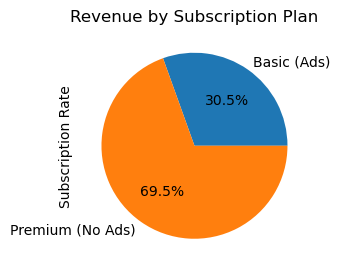

In [27]:
# Revenue by Subscription Plan
(maven_music_customers
    .groupby('Subscription Plan')['Subscription Rate']
    .sum()
    .plot(
        kind = 'pie',
        autopct = '%1.1f%%',
        figsize = (3, 5),
        title = 'Revenue by Subscription Plan'
    )
);

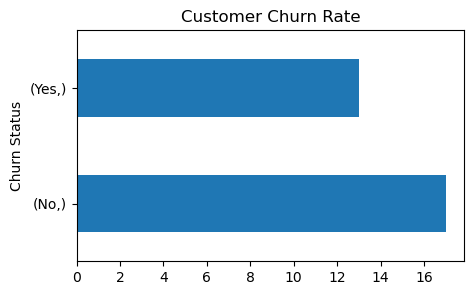

In [28]:
# Churn Customers
churn_status = pd.DataFrame(
    data = np.where(maven_music_customers['Cancellation Date'].isna() == True, 'No', 'Yes'),
    columns = ['Churn Status']
)

churn_status.value_counts().plot(kind = 'barh', figsize = (5, 3), title = 'Customer Churn Rate');

## Factors Making Customers Churn

In [29]:
# Churn rate by month

churn_status = churn_status['Churn Status'].map({'No': 0, 'Yes': 1})


join_month = maven_music_customers['Member Since'].dt.month_name().rename('join_month').to_frame()
churn_by_month = pd.concat([join_month, churn_status], axis = 1)

churn_rate_by_month = (churn_by_month
    .groupby('join_month')['Churn Status']
    .agg(['count', 'sum', 'mean'])
    .rename(
        columns = 
        {
            'sum': 'Churned Customers', 
            'count': 'Total Customers', 
            'mean': 'Churn Rate'
        }
    )
).reset_index()

churn_rate_by_month['Churn Rate'] = (churn_rate_by_month['Churn Rate'] * 100).round(2)

churn_rate_by_month

,join_month,Total Customers,Churned Customers,Churn Rate
0,April,8,3,37.50
1,March,13,4,30.77
2,May,9,6,66.67


In [30]:
# Churn rate in Subscription Plan
subplan_churn_rate = pd.concat([maven_music_customers['Subscription Plan'], churn_status], axis = 1)

(subplan_churn_rate
    .groupby('Subscription Plan')['Churn Status']
    .agg(['count', 'sum', 'mean'])
    .rename(columns = {
        'count':'total customers',
        'sum': 'churned customers',
        'mean': 'churn rate'
    })
    .reset_index()
)

,Subscription Plan,total customers,churned customers,churn rate
0,Basic (Ads),17,4,0.235294
1,Premium (No Ads),13,9,0.692308


In [31]:
## Churn rate among Premium Discount Subscribers
discount_customers = pd.concat([subplan_churn_rate, maven_music_customers['Discount?']], axis = 1)
premium_discount_customer = discount_customers[discount_customers['Discount?'] == 'Yes']

(premium_discount_customer
    .groupby(['Subscription Plan', 'Discount?'], dropna = False)['Churn Status']
    .agg(['count', 'sum', 'mean'])
    .rename(columns = {
        'count':'Customers',
        'sum':'Churned Customers',
        'mean':'Churn Rate'
    })
    .reset_index()
)

,Subscription Plan,Discount?,Customers,Churned Customers,Churn Rate
0,Premium (No Ads),Yes,7,6,0.857143


In [32]:
# Lets explore the combination of Premium customers who are on a discount and joined in May to see the churn rate

maven_music_customers[
    (maven_music_customers['Member Since'].dt.month == 5) & 
    (maven_music_customers['Discount?'] == 'Yes') &
    (maven_music_customers['Subscription Plan'] == 'Premium (No Ads)')    
]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01


    Insights:

    - 43% of our customers joined in the month of March
    - Maven Music makes 70% of its revenue from Premium subscribers

    Reasons why customers churn
    - More than 1 in 2 customers who join the platform in May are likely churn. The longer a customers spends the less likey they are to churn
    - churn rate among Premium users is 3x the rate of Basic subscribers which further increases for discount customers.

    The combination of Premium plan, discounts, and May acquisition creates a perfect storm of churn that requires immediate strategic investigation. 

## Exploration of Listening History, Audio Info and Session

In [33]:
audio_info[['Audio Type', 'Audio ID']] = audio_info['ID'].str.split("-", expand = True)
audio_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
 4   Audio Type  17 non-null     object
 5   Audio ID    17 non-null     object
dtypes: int64(1), object(5)
memory usage: 948.0+ bytes


In [34]:
audio_info['Audio ID'] = audio_info['Audio ID'].astype(int)

customer_listen_history = pd.merge(listen_history, audio_info, on = ['Audio ID', 'Audio Type'])
customer_listen_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52


### What do customers listen to?

In [35]:
customer_listen_history = customer_listen_history.drop('ID', axis = 1)

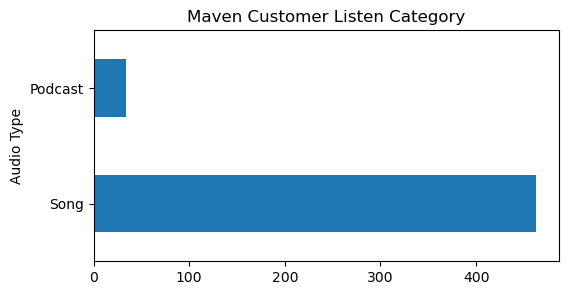

In [36]:
(customer_listen_history['Audio Type']
    .value_counts()
    .plot(
        kind = 'barh',
        figsize = (6, 3),
        title = 'Maven Customer Listen Category'
    )
);

    Customer listen activity is overwhelmingly dominated by Song listen

In [37]:
customer_listen_history['Genre'].value_counts()

Genre
Pop Music     165
Pop            94
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

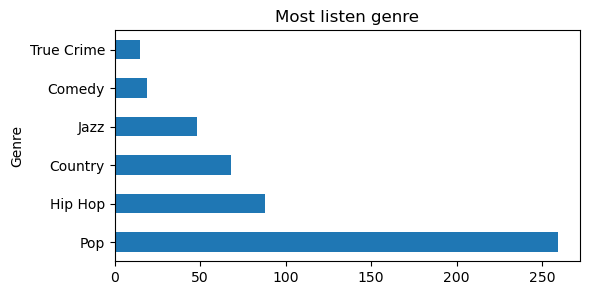

In [38]:
# Group Pop Music and Pop together
customer_listen_history['Genre'] = np.where(
    customer_listen_history['Genre'].isin(['Pop Music', 'Pop']), 'Pop', customer_listen_history['Genre']
)

(customer_listen_history['Genre']
    .value_counts()
    .plot(
        kind = 'barh', 
        title = 'Most listen genre',
        figsize = (6, 3)
    )
);

In [39]:
# Top 10 Songs
customer_listen_history['Name'].value_counts().head(10)

Name
Sunset Boulevard               69
Pop Rocks                      50
Dance All Night                49
Glowing Hearts                 46
Unbreakable Beat               45
Boss Moves                     38
My Old Dog and My True Love    37
Dirt Road Romance              31
Rise Above                     28
Moonlit Serenade               28
Name: count, dtype: int64

### Customer Engagement

In [40]:
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [41]:
active_dates = customer_listen_history[['Customer ID', 'Session ID']].merge(session, on = 'Session ID', how = 'left')
active_dates['Session Log In Time'] = active_dates['Session Log In Time'].dt.date

active_days = (active_dates
    .groupby('Customer ID')['Session Log In Time']
    .nunique()
    .rename('Active Days')
    .to_frame()
    .reset_index()
)

<IPython.core.display.Javascript object>

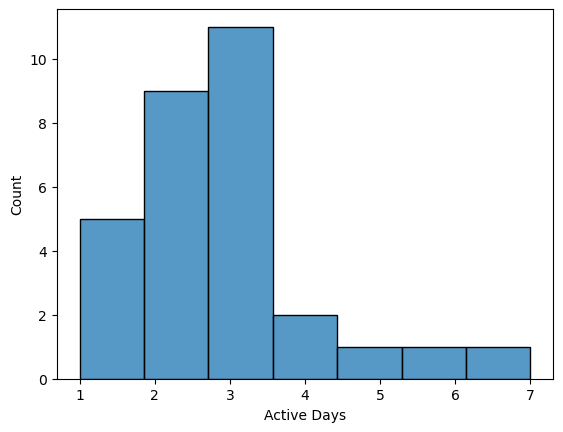

In [42]:
# How active were our customers

sns.histplot(
    data = active_days['Active Days'],
    bins = 7
);

    Most customers (~25 out of 30) were active for only 1-3 days on the platform, with peak activity at 3 days. 
    Only a handful of customers remained active beyond 4 days, and the maximum active days observed was 7.

In [43]:
# Churn rate among customers active for only 1 - 3 days

active_3_days = active_days[active_days['Active Days'] < 4]

(active_3_days
    .merge(churn_status, how = 'left', left_index = True, right_index = True)
    .groupby('Active Days')['Churn Status']
    .mean()
)

Active Days
1    0.800000
2    0.555556
3    0.363636
Name: Churn Status, dtype: float64

In [44]:
# Churn rate among customers active for > 3 days

active_above_3_days = active_days[active_days['Active Days'] > 3]

(active_above_3_days
    .merge(churn_status, how = 'left', left_index = True, right_index = True)
    .groupby('Active Days')['Churn Status']
    .mean()
)

Active Days
4    0.0
5    0.0
6    0.0
7    0.0
Name: Churn Status, dtype: float64

    The analysis reveals that active days is the strongest predictor of churn. 
    Customers who reach 4 active days show 0% churn, while those who remain at 1-3 active days have churn rates ranging from 36-80%. 
    This indicates that getting customers to their 4th active day is the critical activation milestone for retention. 
    Currently, only ~17% of customers reach this threshold.

### Impact of Subscription Plan and Discount on Customer Activity

In [45]:
active_days_by_subscription = active_days.merge(maven_music_customers[['Customer ID', 'Subscription Plan', 'Discount?']], on = 'Customer ID')

active_days_by_subscription.groupby(['Subscription Plan', 'Discount?'], dropna = False)['Active Days'].median()

Subscription Plan  Discount?
Basic (Ads)        NaN          3.0
Premium (No Ads)   Yes          2.0
                   NaN          2.5
Name: Active Days, dtype: float64

    Basic Users are more engaged than Premium users (active days = 3 v 2.5), and discounted Premium users (2.0).

# Putting It all Together 

In [46]:
model_df = pd.concat([maven_music_customers, churn_status, active_days], axis = 1)
model_df = model_df.drop(['Customer ID', 'Customer Name', 'Email', 'Member Since', 'Cancellation Date'], axis = 1)
model_df.head()

,Subscription Plan,Subscription Rate,Discount?,Churn Status,Active Days
0,Basic (Ads),2.99,NaN,0,7
1,Basic (Ads),2.99,NaN,0,4
2,Basic (Ads),2.99,NaN,1,1
3,Basic (Ads),2.99,NaN,0,6
4,Basic (Ads),2.99,NaN,0,4


In [47]:
final_df = model_df.copy()

final_df['Subscription Plan'] = pd.get_dummies(final_df['Subscription Plan'], drop_first = True, dtype = int)
final_df['Discount?'] = final_df['Discount?'].notna().astype(int)

final_df.head()

,Subscription Plan,Subscription Rate,Discount?,Churn Status,Active Days
0,0,2.99,0,0,7
1,0,2.99,0,0,4
2,0,2.99,0,1,1
3,0,2.99,0,0,6
4,0,2.99,0,0,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

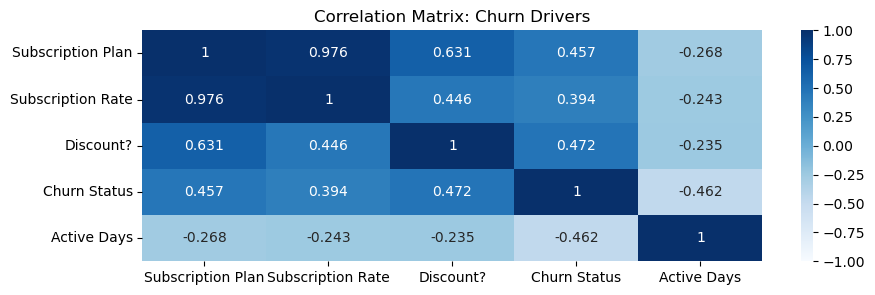

In [48]:
corr = final_df.corr()

plt.figure(figsize = (10, 3))
sns.heatmap(
    data = corr,
    vmin = -1,
    vmax = 1,
    annot = True,
    cmap = 'Blues',
    fmt = '.3g'
).set_title('Correlation Matrix: Churn Drivers');

    The correlation analysis above reveals three main churn drivers;
    - Active Days (-0.462): Customers who engage more frequently are less likely to churn
    - Discount: Giving discounts attract customers. However, these customers are prone to leaving
    - Subscription: The type of subscription a customer is on is also a good indicator of how likely they are to churn and as shown earlier, Premium subscribers are 3 times more likely to churn than Basic Subscribers. This further increases by 24% if the premium subscriber is on a discount.

    - Multicollinearity: Subscription Plan and Subscription Rate